In [1]:
%run chart_data_v1.py

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 3)

In [3]:
import pandas as pd
all_data = pd.read_pickle('all_data.pkl')

In [4]:
cap_data = get_cap_data(all_data)

# remove weird outliers
cap_data = cap_data[cap_data.c_in < 1000]
cap_data = cap_data[cap_data.temp > 15]

ac_data = get_ac_data(all_data)
inv_data = get_inverter_data(all_data)
bike_groups = get_bike_groups(all_data)
dings = get_dings(all_data)

## Time Ranges from Bike Power

Below, we try and find relevant time ranges by visually inspecting when most bikers were active.

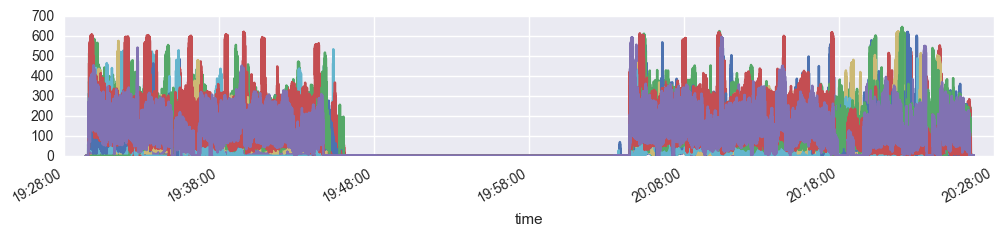

In [55]:
axes = bike_groups.power.plot(xlim=('2016-12-17 19:28:00', '2016-12-17 20:28:00'), figsize=(12, 2))

By inspection, we choose a 15-minute section of time for the first section:

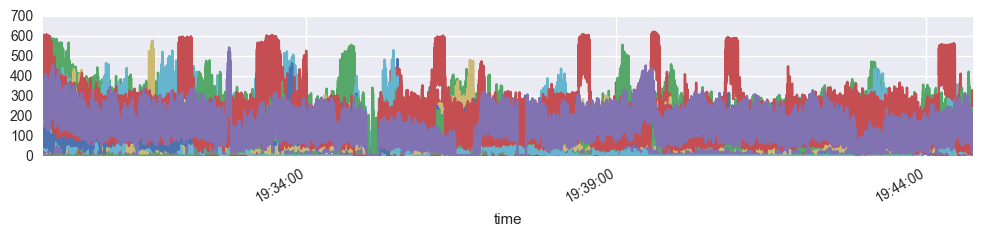

In [56]:
domain_1 = ('2016-12-17 19:29:45', '2016-12-17 19:44:45')
axes = bike_groups.power.plot(xlim=domain_1, figsize=(12, 2))

And a 22-minute section of time for the second session:

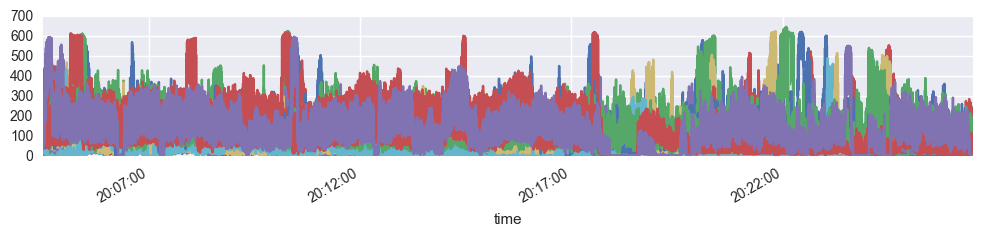

In [57]:
domain_2 = ('2016-12-17 20:04:30', '2016-12-17 20:26:30')
axes = bike_groups.power.plot(xlim=domain_2, figsize=(12, 2))

## Dings

In [7]:
print "There were {} dings total.".format(len(dings))

There were 6 dings total.


(0, 1.1)

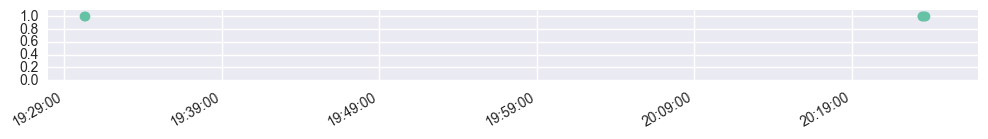

In [8]:
fig, ax = plt.subplots()
ax.plot_date(x=dings.index, y=dings.val)
fig.autofmt_xdate()
fig.set_figheight(1)
ax.set_xlim(domain)
ax.set_ylim((0, 1.1))

## Voltage

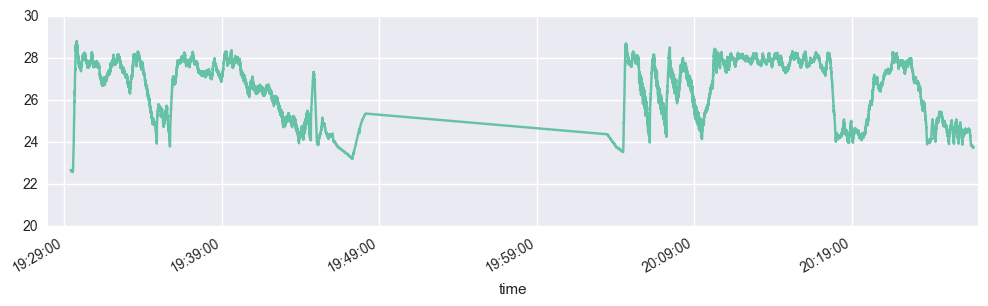

In [9]:
ac_data.v_dc.plot(ylim=(20, 30), xlim=domain)

## DC Power

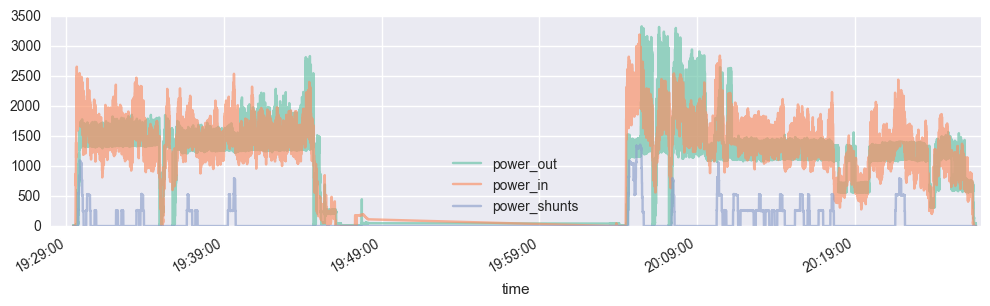

In [10]:
cap_data[['power_out', 'power_in', 'power_shunts']].plot(alpha=0.65, xlim=domain)

## AC Power

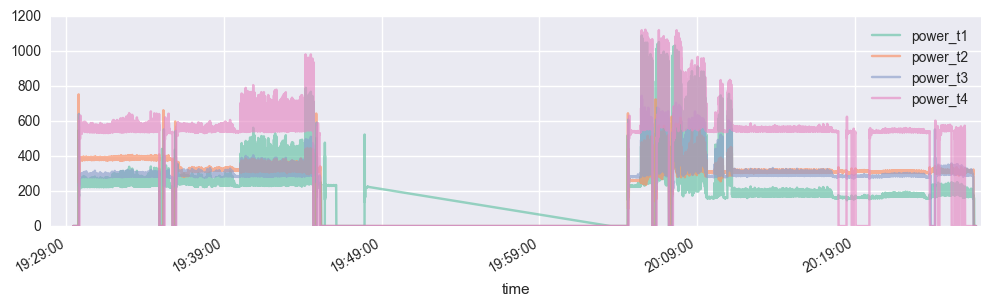

In [11]:
ac_data[['power_t1', 'power_t2', 'power_t3', 'power_t4']].plot(alpha=0.65, xlim=domain)

## Tier and Inverter Control

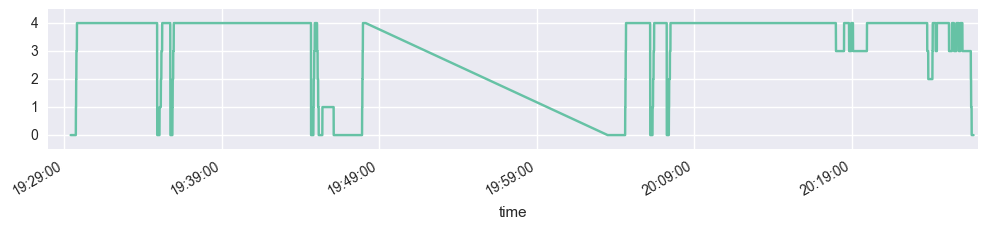

In [12]:
ac_data.tiers.plot(figsize=(12, 2), ylim=(-0.5, 4.5), xlim=domain)

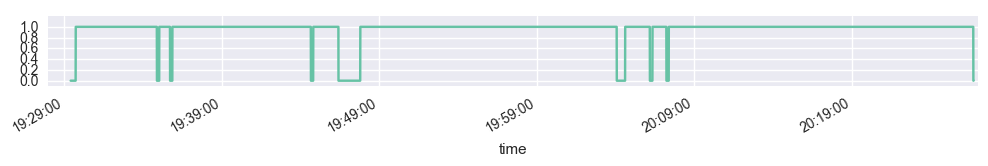

In [13]:
inv_data.soft.plot(figsize=(12, 1), ylim=(-0.1, 1.2), xlim=domain)